## Import Package

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)

## Create the Visualization Function - Bar Chart

In [5]:
def bar_chart(x, y, title, xlabel, ylabel, color, legend, weight, height, ymin, ymax, xticks_rotation): #font_size
    """
    Description: This function can be used to create bar chart/

    Arguments:
        x: the column used in X axis
        y: the column used in Y axis
        xlabel: label of x axis
        ylabel: label of y axis
        color: choose the color show up in the chart
        legend: show up the legend
        weight: define the chart weight
        height: define the chart height
        ymin: define the min value in Y axis
        ymax: define the max value in Y axis
        xticks_rotation:
        
    Returns:
        Bar Chart
    """
    fig, ax = plt.subplots(figsize = (weight, height))

    rects = ax.bar(x, y, color = color, label = legend) #width = bar_width)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    #ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_ylim([ymin,ymax])
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
        
    autolabel(rects)
    plt.xticks(rotation = xticks_rotation) # horizontal, vertical
    
    fig.tight_layout()
    #plt.figure()
    #plt.rcParams.update({'font.size': font_size})
    plt.show()

## Import Dataset

In [28]:
# read input file
listing = pd.read_csv("listings.csv", low_memory=False)

# convert host start date from string to date 
listing["host_since"] = pd.to_datetime(listing["host_since"])

# convert price from string to float and name it as `price_per_day`
listing["price_per_day"] = listing["price"].str.replace('$', '').str.replace(',', '').astype(float)

### Missing Value Check

In [35]:
# Check missing value for all the variables
# In this analysis, we use limited variables which did not affect by the missing value.
listing.isnull().sum().reset_index()

,index,0
0,id,0
1,listing_url,0
2,scrape_id,0
3,last_scraped,0
4,name,17
5,summary,2053
6,space,13672
7,description,840
8,experiences_offered,0
9,neighborhood_overview,16946


In [27]:
listing.shape

(48377, 108)

In [3]:
listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_day
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN,150.0
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""C

# Market Review and Related Questions

In [4]:
print ("What is the total listing?", listing["id"].count())
print ("What is the average price per day?", int(listing["price_per_day"].mean()))
print ("How many hosts in NYC?", listing["host_id"].nunique())
print ("How many neighborhoods in NYC?", listing["neighbourhood_cleansed"].nunique())

What is the total listing? 48377
What is the average price per day? 152
How many hosts in NYC? 36775
How many neighborhoods in NYC? 224


## Listing and Price Review by New York City Boroughs

### Data preparation

In [6]:
boroughs = listing.groupby(["neighbourhood_group_cleansed"]).agg({"id" : "count", "price_per_day" : "mean"}).reset_index()

boroughs.rename(columns = {"neighbourhood_group_cleansed":"Boroughs",
                           "id" : "Listing_Count",
                           "price_per_day" : "Average_Daily_Price"}, inplace = True)

boroughs["Listing_Pct"] = boroughs["Listing_Count"]/boroughs["Listing_Count"].sum()
boroughs.head(10)

,Boroughs,Listing_Count,Average_Daily_Price,Listing_Pct
0,Bronx,1126,85.787744,0.023276
1,Brooklyn,19856,122.902045,0.410443
2,Manhattan,21183,199.501534,0.437873
3,Queens,5853,99.017769,0.120987
4,Staten Island,359,118.883008,0.007421


### Which borough has the most listing?

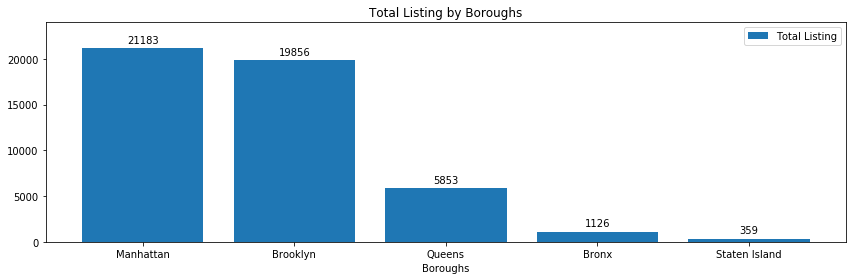

In [7]:
boroughs.sort_values(["Listing_Count"], ascending = False, inplace = True)
bar_chart(x = boroughs["Boroughs"], 
          y = boroughs["Listing_Count"], 
          legend = "Total Listing",
          color = "tab:blue",
          title = "Total Listing by Boroughs", 
          xlabel = "Boroughs",
          ylabel = "Listing",
          weight = 12,
          height = 4,
          ymin = None,
          ymax = 24000,
          #font_size = 14,
          xticks_rotation = "horizontal"
         )

### Which borough has the highest average daily price?

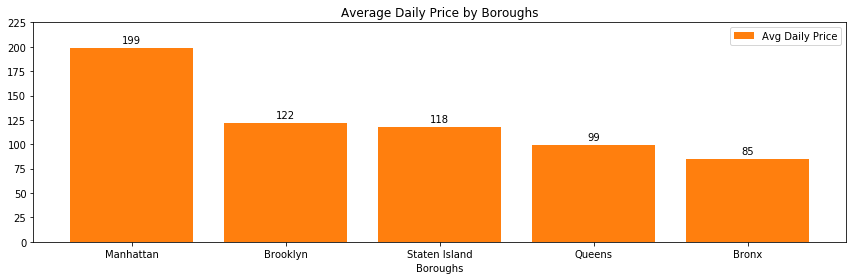

In [8]:
boroughs.sort_values(["Average_Daily_Price"], ascending = False, inplace = True)
bar_chart(x = boroughs["Boroughs"], 
          y = boroughs["Average_Daily_Price"].astype(int), 
          legend = "Avg Daily Price",
          color = "tab:orange",
          title = "Average Daily Price by Boroughs", 
          xlabel = "Boroughs",
          ylabel = "Listing",
          weight = 12,
          height = 4,
          ymin = None,
          ymax = 225,
          #font_size = 14,
          xticks_rotation = "horizontal"
         )

## Listing and Price Review by Neighborhood

### Data preparation

In [9]:
neighborhood = listing.groupby(["neighbourhood_group_cleansed", "neighbourhood_cleansed"]).agg({"id" : "count", "price_per_day" : "mean"}).reset_index()

neighborhood.rename(columns = {"neighbourhood_cleansed":"Neighbourhood",
                                "id" : "Listing_Count",
                                "price_per_day" : "Average_Daily_Price"}, inplace = True)
neighborhood["Listing_Pct"] = neighborhood["Listing_Count"]/boroughs["Listing_Count"].sum()
neighborhood.sort_values(["Listing_Count"], ascending = False, inplace = True)
neighborhood.head(10)

,neighbourhood_group_cleansed,Neighbourhood,Listing_Count,Average_Daily_Price,Listing_Pct
95,Brooklyn,Williamsburg,3815,142.015465,0.078860
51,Brooklyn,Bedford-Stuyvesant,3785,107.718362,0.078240
107,Manhattan,Harlem,2625,120.305524,0.054261
59,Brooklyn,Bushwick,2411,85.694732,0.049838
108,Manhattan,Hell's Kitchen,1923,211.168487,0.039750
126,Manhattan,Upper West Side,1903,208.189175,0.039337
102,Manhattan,East Village,1788,185.920582,0.036960
125,Manhattan,Upper East Side,1750,180.409143,0.036174
66,Brooklyn,Crown Heights,1562,112.889245,0.032288
114,Manhattan,Midtown,1428,276.570728,0.029518


### Which neighborhood has the most listing?

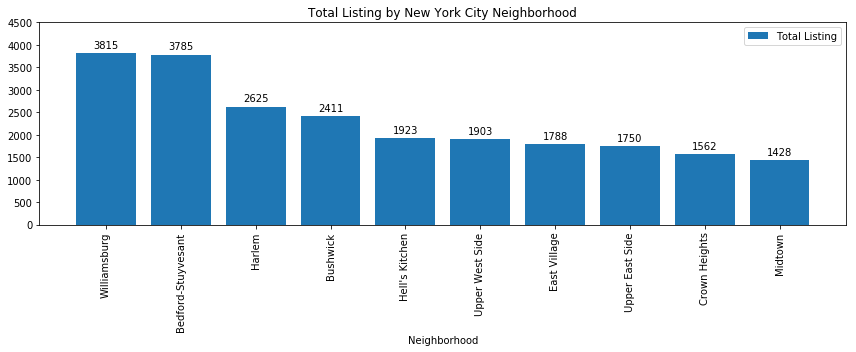

In [10]:
neighborhood.sort_values(["Listing_Count"], ascending = False, inplace = True)
bar_chart(x = neighborhood["Neighbourhood"][0:10], 
          y = neighborhood["Listing_Count"][0:10], 
          legend = "Total Listing",
          color = "tab:blue",
          title = "Total Listing by New York City Neighborhood", 
          xlabel = "Neighborhood",
          ylabel = "Listing",
          weight = 12,
          height = 5,
          ymin = None,
          ymax = 4500,
          #font_size = 8,
          xticks_rotation = "vertical"
         )

### Which neighborhood has the highest average daily price?

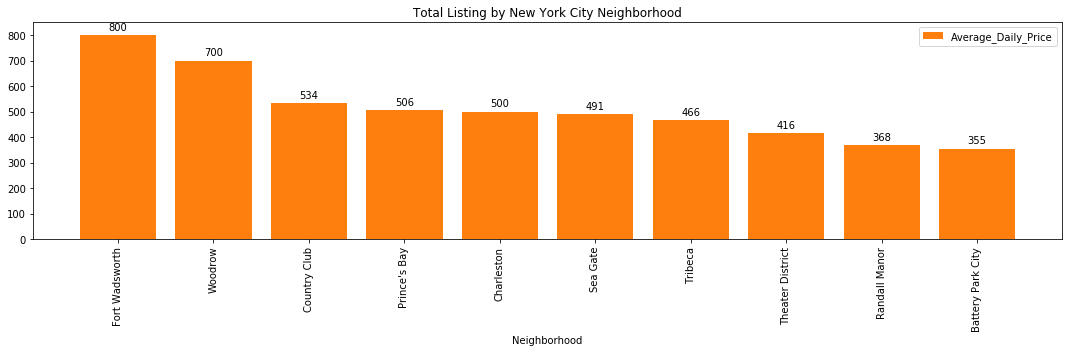

In [21]:
neighborhood.sort_values(["Average_Daily_Price"], ascending = False, inplace = True)
bar_chart(x = neighborhood["Neighbourhood"][0:10], 
          y = neighborhood["Average_Daily_Price"].astype(int)[0:10], 
          legend = "Average_Daily_Price",
          color = "tab:orange",
          title = "Total Listing by New York City Neighborhood", 
          xlabel = "Neighborhood",
          ylabel = "Listing",
          weight = 15,
          height = 5,
          ymin = None,
          ymax = 850,
          #font_size = 10,
          xticks_rotation = "vertical"
         )

## Listing and Price Review by Property Type

### Data preparation

In [12]:
property_type = listing.groupby(["property_type"]).agg({"id" : "count", "price_per_day" : "mean"}).reset_index()

property_type.rename(columns = {"property_type":"Property_Type",
                                "id" : "Listing_Count",
                                "price_per_day" : "Average_Daily_Price"}, inplace = True)

property_type["Listing_Pct"] = property_type["Listing_Count"]/property_type["Listing_Count"].sum()
property_type.head(10)

,Property_Type,Listing_Count,Average_Daily_Price,Listing_Pct
0,Aparthotel,15,276.200000,0.000310
1,Apartment,38144,144.678586,0.788474
2,Barn,2,105.000000,0.000041
3,Bed and breakfast,72,108.208333,0.001488
4,Boat,12,1126.833333,0.000248
5,Boutique hotel,214,523.939252,0.004424
6,Bungalow,37,175.135135,0.000765
7,Bus,2,175.500000,0.000041
8,Cabin,2,182.500000,0.000041
9,Camper/RV,13,90.538462,0.000269


### Which property type has the most listing?

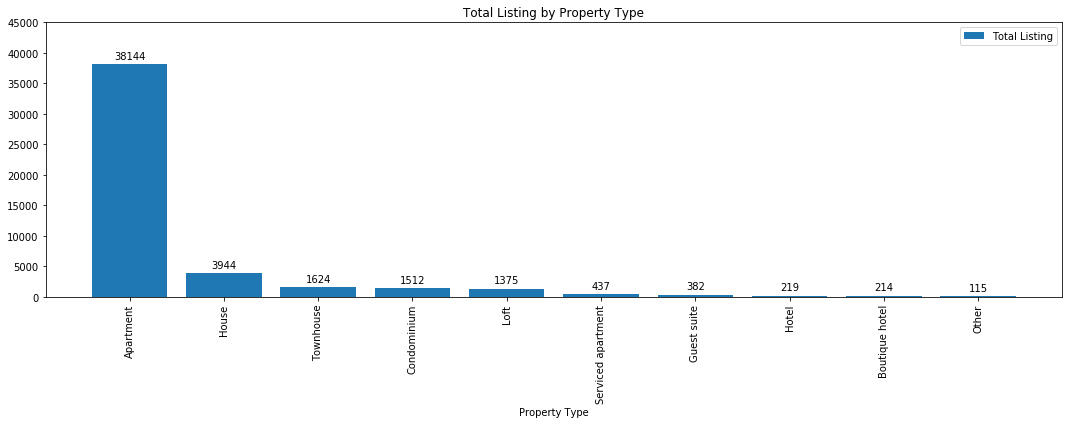

In [13]:
property_type.sort_values(["Listing_Count"], ascending = False, inplace = True)
bar_chart(x = property_type["Property_Type"][0:10], 
          y = property_type["Listing_Count"][0:10], 
          legend = "Total Listing",
          color = "tab:blue",
          title = "Total Listing by Property Type", 
          xlabel = "Property Type",
          ylabel = "Listing",
          weight = 15,
          height = 6,
          ymin = None,
          ymax = 45000,
          #font_size = 8,
          xticks_rotation = "vertical"
         )

## As we can see above, most of lising in NYC are Apartment

### Which property type has the highest average daily price?

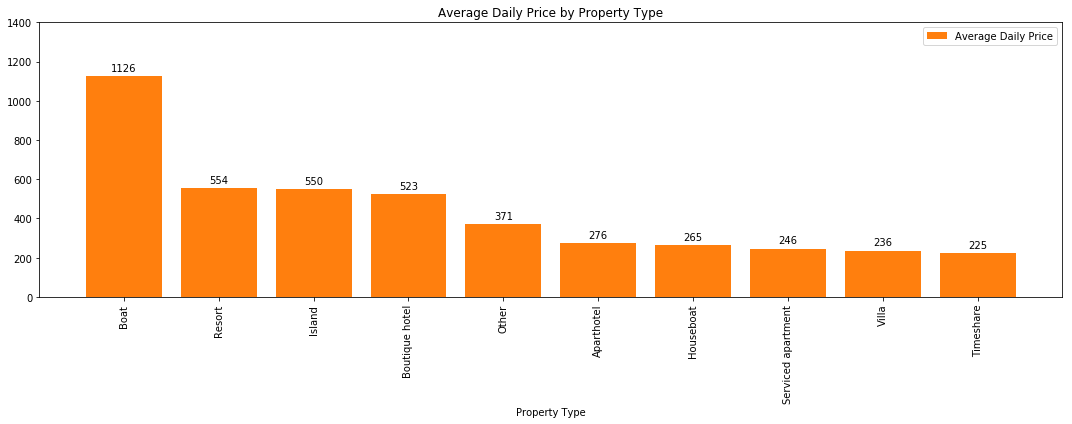

In [14]:
property_type.sort_values(["Average_Daily_Price"], ascending = False, inplace = True)
bar_chart(x = property_type["Property_Type"][0:10], 
          y = property_type["Average_Daily_Price"].astype(int)[0:10], 
          legend = "Average Daily Price",
          color = "tab:orange",
          title = "Average Daily Price by Property Type", 
          xlabel = "Property Type",
          ylabel = "Listing",
          weight = 15,
          height = 6,
          ymin = None,
          ymax = 1400,
          #font_size = 8,
          xticks_rotation = "vertical"
         )

### Based on the chart above, we can see that boat is very popular with $1126 average daily price

## Host Review by Host Year

### What is the listing for each year?

### Data preparation

In [15]:
listing["host_year"] = np.where(listing["host_since"].isnull(), None, listing["host_since"].dt.strftime('%Y'))
listing_count = listing.groupby(["host_year"])[["id"]].count().reset_index()
listing_count.rename(columns = {"id" : "host_count"}, inplace = True)
listing_count["host_in_total"] = listing_count["host_count"].cumsum()
listing_count

,host_year,host_count,host_in_total
0,2008,23,23
1,2009,319,342
2,2010,946,1288
3,2011,2633,3921
4,2012,4627,8548
5,2013,5595,14143
6,2014,7505,21648
7,2015,7787,29435
8,2016,6278,35713
9,2017,4345,40058


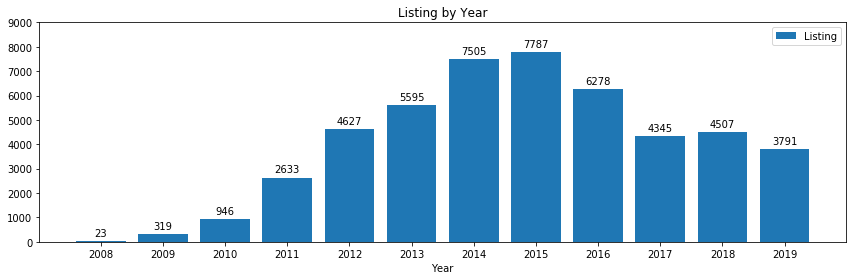

In [16]:
bar_chart(x = listing_count["host_year"], 
          y = listing_count["host_count"], 
          legend = "Listing",
          color = "tab:blue",
          title = "Listing by Year", 
          xlabel = "Year",
          ylabel = "Listing",
          weight = 12,
          height = 4,
          ymin = None,
          ymax = 9000,
          #font_size = 8,
          xticks_rotation = "horizontal"
         )

### For the chart above, we can see that listing value are keep increasing since 2008 and hit the high point on 2015.

## Correlation between Price and Attributes

In [17]:
df_corr=listing[[
                "price_per_day",
                "host_has_profile_pic",
                #"host_identity_verified",
                "accommodates",
                "bathrooms",
                "bedrooms",
                "beds",
                "square_feet",
                "number_of_reviews",
                #"review_scores_value",
                "cleaning_fee",
                "guests_included",
                "extra_people",
                ]]

df_corr["host_has_profile_pic"] = np.where(df_corr["host_has_profile_pic"] == "t", 1, 0)
# df_corr["host_identity_verified"] = np.where(df_corr["host_identity_verified"] == "t", 1, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
#df_corr.groupby(["host_identity_verified"])["host_identity_verified"].count()

In [19]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48377 entries, 0 to 48376
Data columns (total 11 columns):
price_per_day           48377 non-null float64
host_has_profile_pic    48377 non-null int32
accommodates            48377 non-null int64
bathrooms               48329 non-null float64
bedrooms                48336 non-null float64
beds                    48341 non-null float64
square_feet             378 non-null float64
number_of_reviews       48377 non-null int64
cleaning_fee            38143 non-null object
guests_included         48377 non-null int64
extra_people            48377 non-null object
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 3.9+ MB


In [20]:
corr = df_corr.corr()
corr.style.background_gradient()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,price_per_day,host_has_profile_pic,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,guests_included
price_per_day,1,0.00172176,0.313959,0.203075,0.23563,0.230847,0.434403,-0.046929,0.148043
host_has_profile_pic,0.00172176,1,0.00329225,0.00555362,0.00167502,0.000553707,nan,0.00322045,0.00632619
accommodates,0.313959,0.00329225,1,0.344581,0.654763,0.75072,0.447427,0.0717321,0.57277
bathrooms,0.203075,0.00555362,0.344581,1,0.419177,0.376469,0.497734,-0.0324937,0.206908
bedrooms,0.23563,0.00167502,0.654763,0.419177,1,0.665076,0.527303,0.0198207,0.43878
beds,0.230847,0.000553707,0.75072,0.376469,0.665076,1,0.41128,0.0570254,0.496635
square_feet,0.434403,nan,0.447427,0.497734,0.527303,0.41128,1,-0.100271,0.445058
number_of_reviews,-0.046929,0.00322045,0.0717321,-0.0324937,0.0198207,0.0570254,-0.100271,1,0.11659
guests_included,0.148043,0.00632619,0.57277,0.206908,0.43878,0.496635,0.445058,0.11659,1


In [40]:
# Even though, square_feet has strong positive correlation with price_per_day,
# But we noticed that most of value are missing for square_feet, so if I am going to build model, I will drop this variable due high % of missing rate.
listing['square_feet'].isnull().sum()/listing.shape[0]

0.9921863695557807